# 911 Calls Capstone Project

In this project, 911 call data is analysed for further extend my skills in data analysis and data visualisation. 

I will analyse some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [2]:
## Importing the required libraries
# Analysing libs
import numpy as np
import pandas as pd

# Plotting libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font='times new roman',font_scale=1,palette='Greens')

# Make sure I can print more lines in Jupiter....
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

Import the data and loading it in a dataframe named calls

In [3]:
calls = pd.read_csv('911.csv')
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Get some general insight into the data

In [4]:
calls.info()
calls.describe()
calls.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

The data is fairly complete - some zips are missing. Last column is not relevant - let's delete that one.

In [5]:
calls.drop('e',axis=1,inplace=True)
calls.columns #Verification

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr'], dtype='object')

## Geographical dependence

My hypothesis is that the mayority of the calls comes from some specifics zips codes. As in, maybe it's true that zip codes in more rural or under-developed part call 911 more often. Let's explore this by checking the top 5 zip codes of which 911 is called most frequently. Of course this would be correlated with the total of number of people living in this area but that data is not known. 

Let's first get a general view where people are calling from by plotting the lat and lon over the map

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


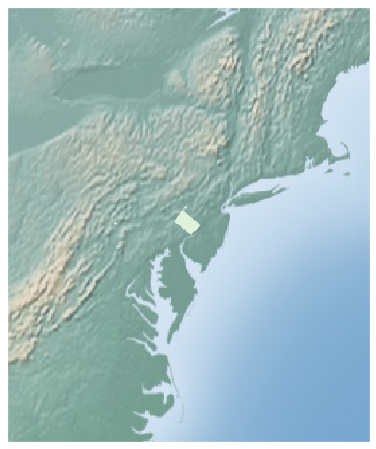

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


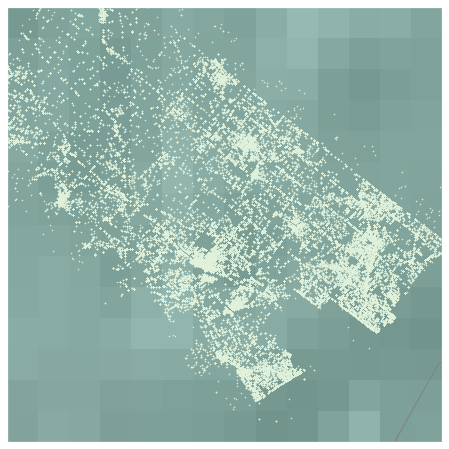

In [6]:
from mpl_toolkits.basemap import Basemap
lat = calls['lat'].values
lon = calls['lng'].values

# Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='l', 
             lat_0=calls['lat'].values.mean(), lon_0=calls['lng'].values.mean(),
             width=1E6, height=1.2E6)
m.shadedrelief()

# Scatter lat and long values
m.scatter(lon, lat, latlon=True,
           cmap='Reds', alpha=1.0,s=0.3)
plt.show()

## Now a zoomed plot
# Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='l', 
             lat_0=calls['lat'].values.mean(), lon_0=calls['lng'].values.mean(),
             width=0.5E5, height=0.5E5)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

 # Scatter lat and long values
m.scatter(lon, lat, latlon=True,
           cmap='Reds', alpha=1.0,s=0.3)
plt.show()

Allright, we see that some of the areas are indeed denser. Let's assign the zipcodes to them

In [7]:
tot_zip=len(calls['zip'].unique()) # Total amount of zip codes
print(tot_zip)

105


In [8]:
tot_call=calls['zip'].value_counts().sum() # Total amount of calls
print(tot_call)
avg_calls_zip=tot_call/tot_zip

86637


The dashed line indicated the total number of calls devided by the number of included zips


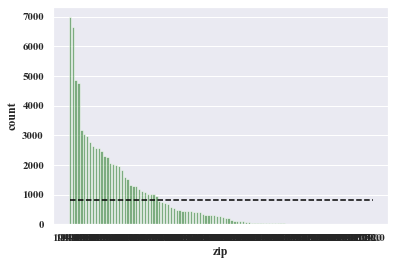

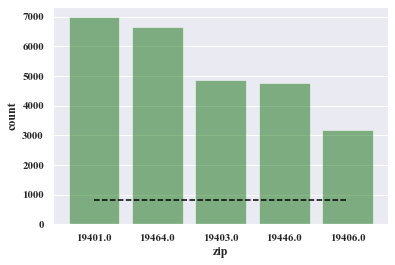

In [9]:
print('The dashed line indicated the total number of calls devided by the number of included zips')
plt.figure()
sns.countplot(x='zip',data=calls,order = calls['zip'].value_counts().index,color='green',alpha=0.5)
plt.plot([0, tot_zip],[avg_calls_zip, avg_calls_zip],color='black',linestyle='--')

plt.figure()
sns.countplot(x='zip',data=calls,order = calls['zip'].value_counts().index[:5],color='green',alpha=0.5)
plt.plot([0, 4],[avg_calls_zip, avg_calls_zip],color='black',linestyle='--')



This confirms the hypothesis. My knowledge of the geographical area is not sufficient to further elaborate on this but still it's a very interesting observations. Let's do the same for the township information.

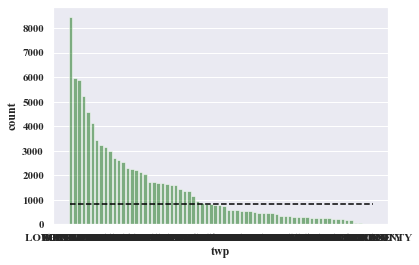

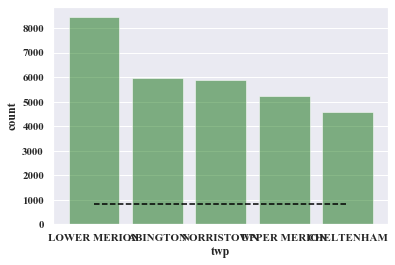

In [10]:
tot_twp=len(calls['twp'].unique()) # Total amount of zip codes
avg_calls_twp=tot_call/tot_zip


plt.figure()
sns.countplot(x='twp',data=calls,order = calls['twp'].value_counts().index,color='green',alpha=0.5)
plt.plot([0, tot_twp],[avg_calls_twp, avg_calls_twp],color='black',linestyle='--')

plt.figure()
sns.countplot(x='twp',data=calls,order = calls['twp'].value_counts().index[0:5],color='green',alpha=0.5)
plt.plot([0, 4],[avg_calls_twp, avg_calls_twp],color='black',linestyle='--')

This trend is less obvious. Therefore, one should focuss on segmening by zip instead of twp. 

## Reason for calling

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [11]:
def give_reason(title):
    return title.split(':')[0]

calls['reason']=calls['title'].apply(lambda x:give_reason(x))
calls.head() # Verification

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS


How many reasons do we have?

In [12]:
calls['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

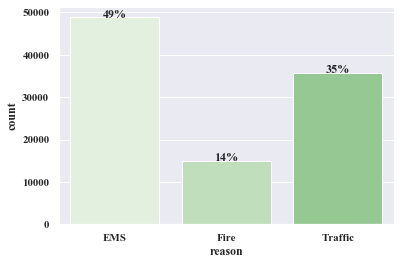

In [13]:
plt.figure()
ax=sns.countplot(x='reason',data=calls)
total = float(len(calls))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format(int(height/total*100))+'%',ha="center")


___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

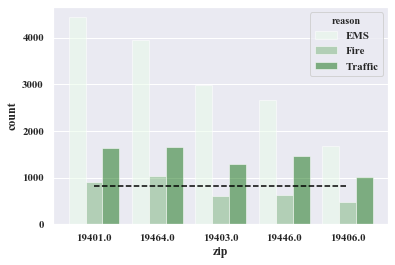

In [14]:
plt.figure()
sns.countplot(x='zip',data=calls,order = calls['zip'].value_counts().index[0:5],color='green',alpha=0.5,hue='reason')
plt.plot([0, 4],[avg_calls_zip, avg_calls_zip],color='black',linestyle='--')

We see that the three different reasons are evenly distributed over the different zips. So we can not prioritise one over the other for different zips. For all holds: EMS > Fire > Traffic

## Time dependence

In [15]:
type(calls['timeStamp'][0])
calls['timeStamp_conv']=pd.to_datetime(calls['timeStamp']) # Add column to stay with original dataset
type(calls['timeStamp_conv'][0]) #verification


pandas._libs.tslibs.timestamps.Timestamp

In [16]:
calls['Year'] = calls['timeStamp_conv'].apply(lambda time: time.year)
calls['Month'] = calls['timeStamp_conv'].apply(lambda time: time.month)
calls['Hour'] = calls['timeStamp_conv'].apply(lambda time: time.hour)
calls['Day'] = calls['timeStamp_conv'].apply(lambda time: time.day)
calls['Day of Week'] = calls['timeStamp_conv'].apply(lambda time: time.dayofweek)

In [17]:
calls['Day of Week'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

Hmmm, this is what I expected - the day of week command returns ints. Let's convert them

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
calls['Day of Week'] = calls['Day of Week'].map(dmap)
calls['Day of Week'].unique()

array(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

In [19]:
print(calls['Year'].value_counts()/calls['Year'].value_counts().sum())

2016    0.919903
2015    0.080097
Name: Year, dtype: float64


According to the above, let's focus on 2016. Now lets see whether we can identify some trends in months / day of year. My hypothesis would be that the amount of calls increased for example in the middle of winter and in the weekends.

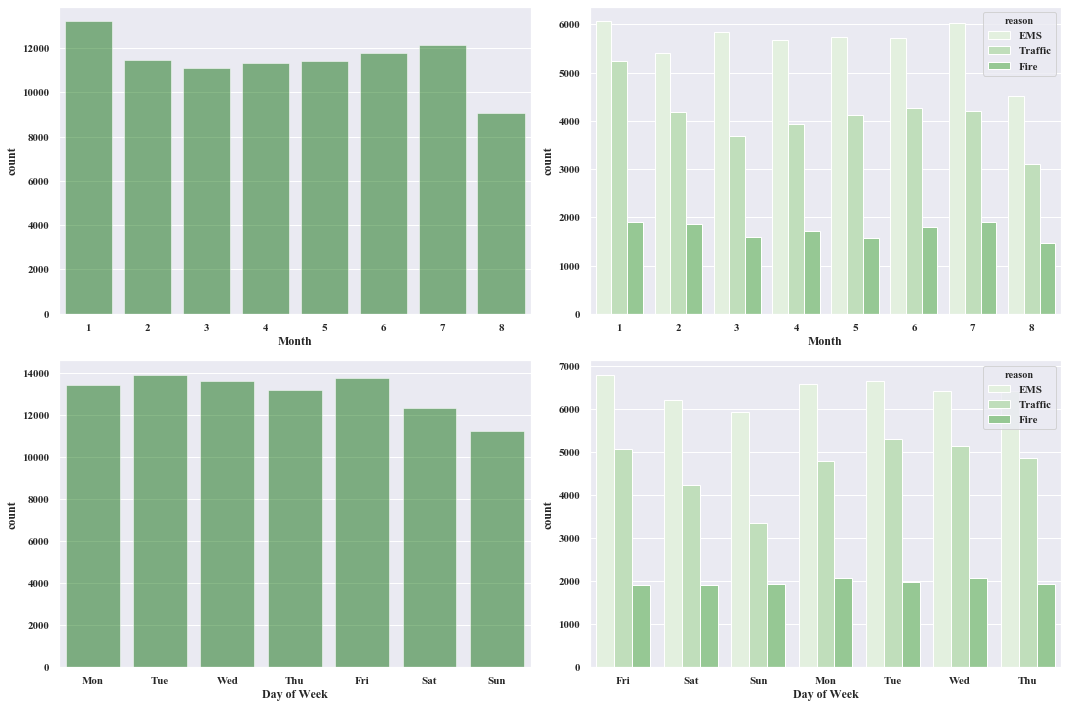

In [20]:
calls_2016 = calls[calls['Year']>2015]

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,10))

sns.countplot(x='Month',data=calls_2016,ax=axes[0][0],color='green',alpha=0.5)
sns.countplot(x='Month',data=calls_2016,ax=axes[0][1],hue='reason',hue_order='EMS Traffic Fire'.split())
sns.countplot(x='Day of Week',data=calls_2016,ax=axes[1][0],order='Mon Tue Wed Thu Fri Sat Sun'.split(),color='green',alpha=0.5)
sns.countplot(x='Day of Week',data=calls_2016,ax=axes[1][1],hue='reason',hue_order='EMS Traffic Fire'.split())
plt.tight_layout()

Our data only contains months Jan-Aug for 2016. January clearly has the highest number of calls. Has this something to do with NYE? Let's figure that out.

In [21]:
calls['Date']=calls['timeStamp_conv'].apply(lambda x: x.date())
calls['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

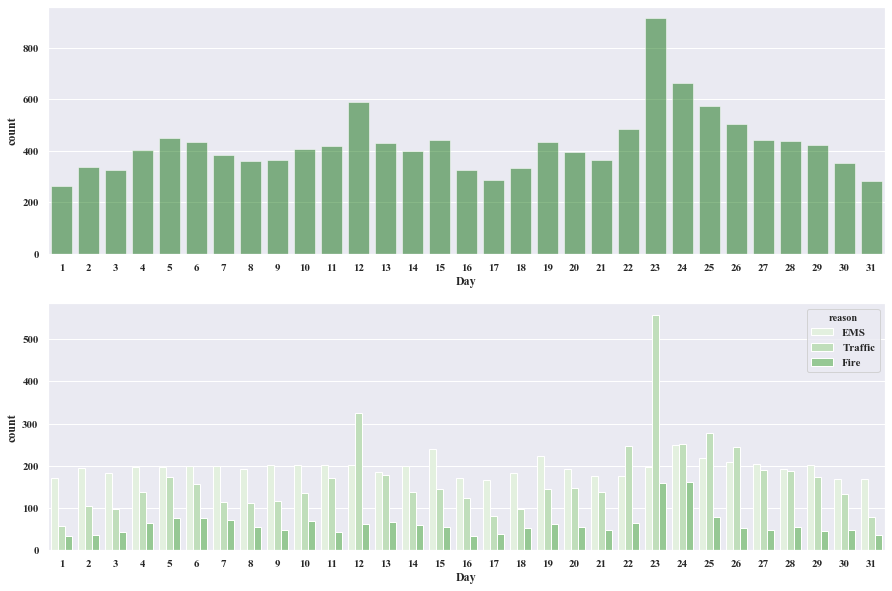

In [22]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(15,10))
calls_jan=calls[calls['Month']==1]
#calls_jan.groupby('Date').count()['twp'].plot.bar(figsize=(15,3),label='total',color='green',hue='reason')

sns.countplot(x='Day',data=calls_jan,ax=axes[0],color='green',alpha=0.5)
sns.countplot(x='Day',data=calls_jan,ax=axes[1],hue='reason',hue_order='EMS Traffic Fire'.split())

The hypothesis regarding NYE is rejected based on the data. Remarkable are the peaks in traffic calls for the dates around the 24th. Could it be that the weather affected this number? Further, the pattern of the weekend resulting in less calls is clearly visible in this plot as well. 


## Global view
In the previous, the month January was considered in the analyses. Let's now discover whether the same conclusions hold if we consider the entire dataset. 

To do so, we would like to see the call density over the entire week - 24/7. Let's modify the dateframe

In [31]:
calls_overweek = calls.groupby(['Day of Week', 'Hour']).count()['twp'].unstack(level=1)
calls_overweek

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


Looks great, but starting with monday would be nicer for plotting I guess

In [33]:
calls_overweek=calls_overweek.reindex('Mon Tue Wed Thu Fri Sat Sun'.split())
calls_overweek

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330


Now, let's explore what the 'hot' days and times are:

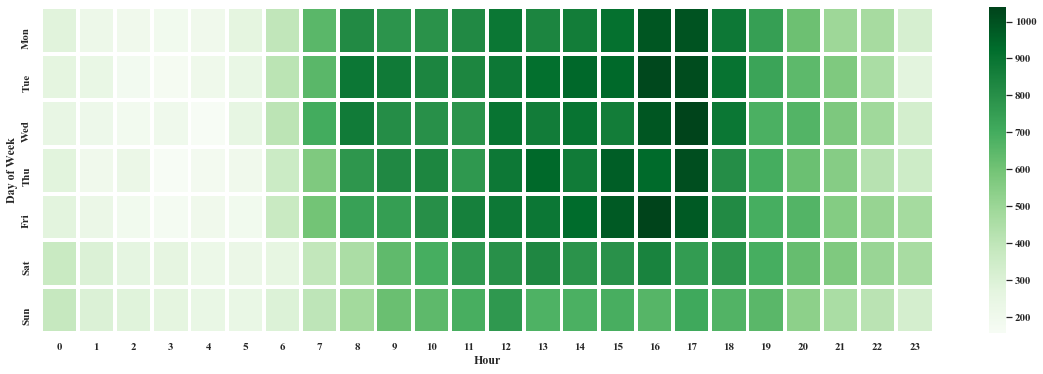

In [51]:
plt.figure(figsize=(20,6))
axes=sns.heatmap(calls_overweek,cmap='Greens',linewidth=3)

Clearly, the week days are 'busier' compared to the weekend days. During the weekend it is more spread out, while you see a clear peak around 5pm during the week days. Of course this is because of the traffic. Well, is this the case? Let's figure that our. 

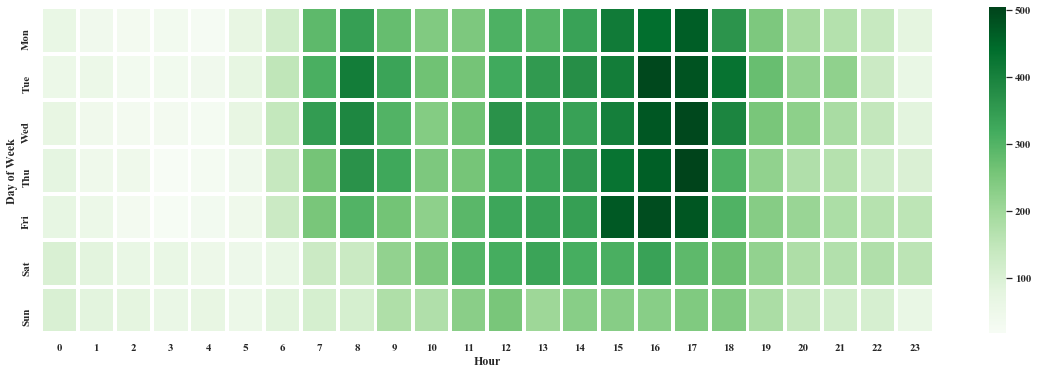

In [56]:
calls_traffic= calls[calls['reason']=='Traffic']
calls_traffic_overweek = calls_traffic.groupby(['Day of Week', 'Hour']).count()['twp'].unstack(level=1)
calls_traffic_overweek=calls_traffic_overweek.reindex('Mon Tue Wed Thu Fri Sat Sun'.split())


plt.figure(figsize=(20,6))
axes=sns.heatmap(calls_traffic_overweek,cmap='Greens',linewidth=3)

This plot verifies my hypothesis as the peaks become even more apparent during these peak hours. Now, lets do the same but on a month-day basis. 

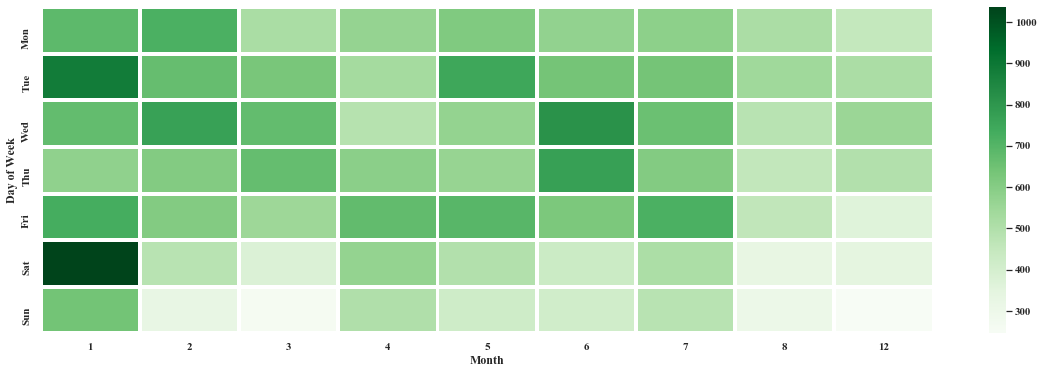

In [65]:
calls_traffic_weekmonth = calls_traffic.groupby(['Day of Week', 'Month']).count()['twp'].unstack(level=1)
calls_traffic_weekmonth=calls_traffic_weekmonth.reindex('Mon Tue Wed Thu Fri Sat Sun'.split())

plt.figure(figsize=(20,6))
axes=sns.heatmap(calls_traffic_weekmonth,cmap='Greens',linewidth=3)



It can clearly be seen that most of the calls are on Saturdays in january. Why this is? No idea that would be interesting to investigate.

This project was mainly focussed on data visualisation. Seaborn's capabilities were discovered on this interesting dataset.